# Tugas Kecil IF3270: Eksplorasi library Algoritme Pembelajaran pada Jupyter Notebook

Oleh:

| Nama  | NIM  | 
| :------------ |:---------------:|
| Steven      | 13520131 |
| Dimas Faidh Muzaki      | 13520156        |


## 1. Membaca dataset dan membagi dataset

In [30]:
from sklearn import datasets, model_selection

breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2. Pembelajaran Mesin dengan berbagai algoritma

In [31]:
algorithms = ['Decision Tree', 'Id3Estimator', 'Kmeans', 'Logistic Regression', 'Neural Network' ,'SVM']
accuracies = []
precisions = []
recalls = []
f1s = []

## 2.a. Decision Tree Classifier

In [32]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

r = tree.export_text(decision_tree)
print(r)

|--- feature_27 <= 0.14
|   |--- feature_23 <= 957.45
|   |   |--- feature_22 <= 107.75
|   |   |   |--- feature_29 <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_29 >  0.06
|   |   |   |   |--- feature_6 <= 0.14
|   |   |   |   |   |--- feature_13 <= 48.98
|   |   |   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |   |   |--- feature_27 <= 0.10
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_27 >  0.10
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |   |   |--- feature_21 <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_21 >  32.83
|   |   |   |   |   |   |   |   |--- feature_21 <= 33.81
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_21 >  33.81
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_13 >  48.98
|   |   |   |   |   |  

In [33]:
import pickle
pickle.dump(decision_tree, open('decision_tree_classification.sav', 'wb'))

In [34]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
loaded_decision_tree = pickle.load(open('decision_tree_classification.sav', 'rb'))

y_pred = loaded_decision_tree.predict(X_test);

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred)
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred)
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training DecisionTreeClassifier adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training DecisionTreeClassifier adalah sebagai berikut:
Accuracy      : 0.9122807017543859
Precision     : 0.9672131147540983
Recall        : 0.8805970149253731
F1-score      : 0.9218749999999999

Confusion matrix yang terbentuk:
 [[45  2]
 [ 8 59]]


## 2.b. Id3Estimator

In [35]:
# Initialization
from sklearn.tree import DecisionTreeClassifier as Id3Estimator
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import datasets, model_selection

In [36]:
# Training
classifier = Id3Estimator()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Saving Model
with open('classifier.pickle', 'wb') as model:
  pickle.dump(classifier, model)

In [38]:
# Load model
with open('classifier.pickle', 'rb') as model:
  classifier = pickle.load(model)

# Evaluasi hasil prediksi
y_pred = classifier.predict(X_test)

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred)
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred)
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training Id3Estimator adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training Id3Estimator adalah sebagai berikut:
Accuracy      : 0.9035087719298246
Precision     : 0.9516129032258065
Recall        : 0.8805970149253731
F1-score      : 0.9147286821705426

Confusion matrix yang terbentuk:
 [[44  3]
 [ 8 59]]


## 2.c. K Means

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0,n_clusters=2)
kmeans_predict = kmeans.fit_predict(X_train)
kmeans_fit = kmeans.fit(X_train)

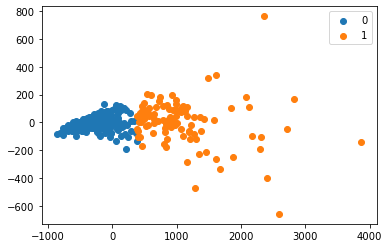

In [40]:
# Visualize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


#Load Data
data = X_train
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)

#Getting unique labels
 
u_labels = np.unique(kmeans_predict)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[kmeans_predict == i , 0] , df[kmeans_predict == i , 1] , label = i)
plt.legend()
plt.show()

In [41]:
import pickle
pickle.dump(kmeans_fit, open('kmeans.sav', 'wb'))

In [42]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
loaded_kmeans = pickle.load(open('kmeans.sav', 'rb'))
y_pred = loaded_kmeans.predict(X_test);

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred, average='micro')
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred,average='micro')
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred,average='micro')
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training Kmeans adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training Kmeans adalah sebagai berikut:
Accuracy      : 0.18421052631578946
Precision     : 0.18421052631578946
Recall        : 0.18421052631578946
F1-score      : 0.18421052631578946

Confusion matrix yang terbentuk:
 [[21 26]
 [67  0]]


## 2.d. Logistic Regression

In [43]:
# Initialization
from sklearn.linear_model import LogisticRegression

In [44]:
# Training
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=3000).fit(X_train, y_train)

In [45]:
# Saving Model
import pickle

with open('log_reg_model.pickle', 'wb') as model:
  pickle.dump(log_reg_model, model)

In [46]:
# Load model
with open('log_reg_model.pickle', 'rb') as model:
  loaded_log_reg_model = pickle.load(model)

# Evaluasi hasil prediksi
y_pred = loaded_log_reg_model.predict(X_test)

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred)
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred)
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training Logistic Regression adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training Logistic Regression adalah sebagai berikut:
Accuracy      : 0.9473684210526315
Precision     : 0.9841269841269841
Recall        : 0.9253731343283582
F1-score      : 0.9538461538461538

Confusion matrix yang terbentuk:
 [[46  1]
 [ 5 62]]


## 2.e. Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
neural_n = MLPClassifier(random_state=0)
neural_n = neural_n.fit(X_train, y_train)

In [48]:
import pickle
pickle.dump(neural_n, open('neural_network.sav', 'wb'))


In [49]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

loaded_neural_n = pickle.load(open('neural_network.sav', 'rb'))
y_pred = loaded_neural_n.predict(X_test);

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred)
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred)
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training Neural Network adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training Neural Network adalah sebagai berikut:
Accuracy      : 0.9473684210526315
Precision     : 0.9552238805970149
Recall        : 0.9552238805970149
F1-score      : 0.9552238805970149

Confusion matrix yang terbentuk:
 [[44  3]
 [ 3 64]]


## 2.f. SVM

In [50]:
# Initialization
from sklearn.svm import SVC

In [51]:
# Training
svm_model = SVC().fit(X_train, y_train)

In [52]:
# Saving Model
import pickle

with open('svm_model.pickle', 'wb') as model:
  pickle.dump(svm_model, model)

In [53]:
# Load Model
with open('svm_model.pickle', 'rb') as model:
  loaded_svm_model = pickle.load(model)

# Evaluasi hasil prediksi
y_pred = loaded_svm_model.predict(X_test)

# 1. Metrix Accuracy
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)

# 2. Metric Precision
prec = precision_score(y_test, y_pred)
precisions.append(prec)

# 3. Metric Recall
rec = recall_score(y_test, y_pred)
recalls.append(rec)

# 4. Metric F1
f1 = f1_score(y_test, y_pred)
f1s.append(f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Hasil evaluasi prediksi pada training SVM adalah sebagai berikut:")
print("Accuracy      :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1-score      :", f1)
print()
print("Confusion matrix yang terbentuk:\n", cm)

Hasil evaluasi prediksi pada training SVM adalah sebagai berikut:
Accuracy      : 0.9298245614035088
Precision     : 0.9041095890410958
Recall        : 0.9850746268656716
F1-score      : 0.9428571428571428

Confusion matrix yang terbentuk:
 [[40  7]
 [ 1 66]]


## 3. Evaluasi Metrik

In [54]:
# Tabulasi Hasil Metrik
from prettytable import PrettyTable
A = PrettyTable()
A.add_column("Algorithms",algorithms)
A.add_column("Accuracy", accuracies)
A.add_column("Precision", precisions)
A.add_column("Recall", recalls)
A.add_column("F1", f1s)
print(A)

+---------------------+---------------------+---------------------+---------------------+---------------------+
|      Algorithms     |       Accuracy      |      Precision      |        Recall       |          F1         |
+---------------------+---------------------+---------------------+---------------------+---------------------+
|    Decision Tree    |  0.9122807017543859 |  0.9672131147540983 |  0.8805970149253731 |  0.9218749999999999 |
|     Id3Estimator    |  0.9035087719298246 |  0.9516129032258065 |  0.8805970149253731 |  0.9147286821705426 |
|        Kmeans       | 0.18421052631578946 | 0.18421052631578946 | 0.18421052631578946 | 0.18421052631578946 |
| Logistic Regression |  0.9473684210526315 |  0.9841269841269841 |  0.9253731343283582 |  0.9538461538461538 |
|    Neural Network   |  0.9473684210526315 |  0.9552238805970149 |  0.9552238805970149 |  0.9552238805970149 |
|         SVM         |  0.9298245614035088 |  0.9041095890410958 |  0.9850746268656716 |  0.94285714285

Hasil evaluasi prediksi pada training yang dilakukan diukur menggunakan 5 buah pengukuran yaitu accuracy, precision, recall, F1-score, dan confusion matrix. Dengan melihat dari istilah masing-masing, F1-Score dan confusion matrix merupakan 2 buah aspek terbaik yang dapat mengukur overall performance.

Dalam kasus ini, digunakan F1-Score, dapat dilihat bahwa Logistic Regression, Neural Network, dan Decision Tree merupakan algoritma yang menghasilkan performa yang baik; Decision Tree dan Id3Estimator merupakan algoritma yang menghasilkan performa yang cukup baik; K Means merupakan algoritma yang menghasilkan performa yang paling buruk, bahkan perbedaannya jauh dengan yang lainnya. Menurut kami, hal ini dikarenakan pembelajaran menggunakan algoritma KMeans merupakan pembelajaran yang bersifat Unsupervised. Oleh sebab, itu hasil peforma model sangat jauh dibandingkan dengan model lain yang tipe pembelajarannya adalah supervised.

## 4. K-fold Cross Validation pada Model dengan algoritma Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decision_tree = DecisionTreeClassifier(random_state=0)

k_fold = cross_validate(estimator=decision_tree,
                               X=X,
                               y=y,
                               cv=10,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               return_train_score=True)
print("Hasil evaluasi Akurasi dan F1 pada 10-Fold Cross Validation adalah:")
print("Accuracy      :",k_fold['test_accuracy'].mean())
print("F1-Score      :",k_fold['test_f1'].mean())

Hasil evaluasi Akurasi dan F1 pada 10-Fold Cross Validation adalah:
Accuracy      : 0.9174498746867167
F1-Score      : 0.9340736762542807


In [56]:
from sklearn.metrics import accuracy_score, f1_score

loaded_decision_tree = pickle.load(open('decision_tree_classification.sav', 'rb'))

y_pred = loaded_decision_tree.predict(X_test);

# 1. Metric Accuracy
acc = accuracy_score(y_test, y_pred)

# 2. Metric F1
f1 = f1_score(y_test, y_pred)

In [57]:
# Tabulasi Hasil Metrik
from prettytable import PrettyTable
B = PrettyTable()
B.add_column("",["Decision Tree Classifier Model", "10-Fold Validation"])
B.add_column("Accuracy",[acc, k_fold['test_accuracy'].mean()])
B.add_column("F1-Score",[f1, k_fold['test_f1'].mean()])

print("Perbandingan: ")
print(B)

Perbandingan: 
+--------------------------------+--------------------+--------------------+
|                                |      Accuracy      |      F1-Score      |
+--------------------------------+--------------------+--------------------+
| Decision Tree Classifier Model | 0.9122807017543859 | 0.9218749999999999 |
|       10-Fold Validation       | 0.9174498746867167 | 0.9340736762542807 |
+--------------------------------+--------------------+--------------------+


Tabel perbandingan di atas menunjukkan bahwa nilai metrik yang dihasilkan tidak berbeda jauh. Model yang dibangun dengan 10-Fold Cross Validation hanya sedikit lebih baik daripada model Decision Tree sebelumnya.